In [1]:
! gdown --id 16Qx34LK0j3mnq3f0lg2cuTJW0IyGQz6t

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=16Qx34LK0j3mnq3f0lg2cuTJW0IyGQz6t
From (redirected): https://drive.google.com/uc?id=16Qx34LK0j3mnq3f0lg2cuTJW0IyGQz6t&confirm=t&uuid=8de2f0d5-0bb5-4d81-b597-24569341e7b2
To: /content/Qadam.v2i.yolov8.zip
100% 54.1M/54.1M [00:02<00:00, 24.4MB/s]


In [2]:
! unzip -q /content/Qadam.v2i.yolov8.zip

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 24.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
model = YOLO('yolov8m-seg.yaml')
model = YOLO('yolov8m-seg.pt')

100%|██████████| 52.4M/52.4M [00:00<00:00, 109MB/s]


In [8]:
%cat /content/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 9
names: ['Human_walkway', 'car', 'human', 'pedestrian', 'road', 'scooter', 'stroller', 'traffic_light', 'tree']

roboflow:
  workspace: myforge-rxueg
  project: qadam
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/myforge-rxueg/qadam/dataset/2

In [9]:
import yaml

with open("/content/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [10]:
num_classes

'9'

Train model

In [11]:
project = '/content/drive/MyDrive/Yolo/results'
name = "200_epoch-"

In [12]:
results = model.train(data="/content/data.yaml",
                      project = project,
                      name=name,
                      epochs=220,
                      patience=0,
                      batch=3)

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/data.yaml, epochs=220, time=None, patience=0, batch=3, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Yolo/results, name=200_epoch-9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 18.7MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 162 images, 0 backgrounds, 0 corrupt: 100%|██████████| 162/162 [00:00<00:00, 747.30it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 690.51it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to /content/drive/MyDrive/Yolo/results/200_epoch-9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0004921875), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Yolo/results/200_epoch-9
Starting training for 220 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/220       2.5G     0.9755      2.037      2.294      1.238         28        640: 100%|██████████| 54/54 [00:14<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]

                   all         24        140      0.509      0.609      0.553      0.402       0.46      0.579      0.524      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/220      2.24G     0.8456      1.291      1.309      1.101         47        640: 100%|██████████| 54/54 [00:12<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]


                   all         24        140      0.511      0.655      0.598      0.428      0.494      0.639      0.596      0.399

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/220       2.2G     0.8497      1.275      1.326      1.121         15        640: 100%|██████████| 54/54 [00:12<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all         24        140      0.738      0.578      0.615      0.427      0.733      0.574      0.608      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/220       2.3G     0.8826      1.359      1.288      1.139         35        640: 100%|██████████| 54/54 [00:12<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all         24        140      0.554      0.612      0.646      0.443      0.521      0.595      0.623      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/220      2.28G      0.877      1.319      1.219      1.108         57        640: 100%|██████████| 54/54 [00:11<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all         24        140      0.621      0.625      0.551      0.381       0.62      0.625      0.565      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/220      2.22G     0.8578       1.22      1.092      1.109         29        640: 100%|██████████| 54/54 [00:11<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all         24        140      0.678      0.648      0.675      0.479      0.699      0.675      0.703      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/220       2.2G     0.8498      1.236      1.025       1.11         24        640: 100%|██████████| 54/54 [00:12<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.84it/s]

                   all         24        140        0.6      0.691      0.652      0.483      0.574      0.701      0.666      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/220      2.23G     0.7897      1.126     0.9317      1.065         38        640: 100%|██████████| 54/54 [00:13<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.71it/s]

                   all         24        140      0.661      0.672      0.682       0.48      0.676      0.697      0.691      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/220      2.21G      0.794      1.036     0.9181      1.089         53        640: 100%|██████████| 54/54 [00:13<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.63it/s]

                   all         24        140      0.589      0.643      0.642      0.443      0.527      0.596      0.587      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/220      2.19G     0.7865      1.021      0.909      1.083         19        640: 100%|██████████| 54/54 [00:12<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]

                   all         24        140      0.531      0.757      0.667      0.465      0.627      0.679      0.677      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/220       2.2G     0.7844     0.9819     0.8626      1.071         54        640: 100%|██████████| 54/54 [00:11<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all         24        140      0.575      0.744      0.669      0.492      0.611      0.751      0.673       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/220      2.32G     0.7602      1.052     0.8729      1.051         36        640: 100%|██████████| 54/54 [00:11<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all         24        140      0.642      0.644      0.663      0.481      0.628      0.643      0.661      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/220      2.28G     0.7502      1.012     0.8377      1.035         38        640: 100%|██████████| 54/54 [00:12<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.41it/s]

                   all         24        140      0.545      0.731      0.666      0.462      0.562      0.769      0.661      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/220      2.21G     0.7207      0.993     0.7832      1.026         52        640: 100%|██████████| 54/54 [00:13<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.46it/s]

                   all         24        140      0.638      0.684      0.681      0.494      0.621      0.667      0.679      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/220      2.29G     0.7175     0.9386     0.7973       1.02         19        640: 100%|██████████| 54/54 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.80it/s]

                   all         24        140      0.628      0.759      0.705      0.499      0.658      0.689      0.688      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/220      2.23G     0.7087     0.9378     0.7847      1.048         43        640: 100%|██████████| 54/54 [00:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.64it/s]

                   all         24        140      0.587      0.714      0.686      0.485       0.58      0.703       0.67      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/220      2.25G     0.7116     0.9134     0.7175      1.025         30        640: 100%|██████████| 54/54 [00:11<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]


                   all         24        140      0.638      0.688      0.698      0.493      0.647      0.702      0.711      0.444

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/220      2.26G      0.714     0.9013     0.7295      1.013         40        640: 100%|██████████| 54/54 [00:11<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         24        140      0.703      0.648      0.679      0.483      0.728      0.684       0.69      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/220      2.34G     0.6834     0.8997     0.7363      1.018         39        640: 100%|██████████| 54/54 [00:12<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]

                   all         24        140      0.645      0.666        0.7      0.502      0.633      0.687        0.7       0.46



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/220      2.23G     0.6855     0.9179     0.7056     0.9977         51        640: 100%|██████████| 54/54 [00:13<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.20it/s]

                   all         24        140      0.713      0.666      0.692      0.514      0.722      0.688      0.704      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/220      2.21G     0.6631     0.8341      0.665     0.9922         19        640: 100%|██████████| 54/54 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.45it/s]

                   all         24        140      0.601       0.67      0.675      0.499      0.723      0.606      0.678      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/220       2.3G     0.6777      0.902     0.6706      1.009         13        640: 100%|██████████| 54/54 [00:13<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.02it/s]

                   all         24        140      0.639      0.766      0.726      0.515      0.597      0.727      0.686      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/220      2.28G     0.6414     0.8292      0.663     0.9908         68        640: 100%|██████████| 54/54 [00:12<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]


                   all         24        140      0.649      0.654      0.693      0.491      0.594      0.699       0.68      0.458

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/220      2.29G     0.6642     0.9059     0.6543     0.9981         30        640: 100%|██████████| 54/54 [00:10<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]


                   all         24        140      0.735      0.661      0.687      0.491      0.667      0.732      0.689      0.475

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/220      2.21G     0.6739     0.8722     0.6776      1.006         32        640: 100%|██████████| 54/54 [00:12<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.39it/s]

                   all         24        140      0.698      0.688      0.707      0.516      0.706      0.701      0.709      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/220      2.29G     0.6425     0.8873     0.6426     0.9777         39        640: 100%|██████████| 54/54 [00:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.84it/s]

                   all         24        140      0.757      0.628      0.688      0.499      0.607      0.657      0.636       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/220      2.19G     0.6284     0.8501     0.6451     0.9737         41        640: 100%|██████████| 54/54 [00:13<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.49it/s]

                   all         24        140      0.692      0.694      0.719      0.532      0.679      0.737      0.739      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/220      2.23G     0.6112     0.8526     0.5919      0.971         46        640: 100%|██████████| 54/54 [00:13<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all         24        140      0.656      0.745      0.696      0.526      0.668      0.744      0.696      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/220      2.37G     0.6436     0.8642     0.6421     0.9795         26        640: 100%|██████████| 54/54 [00:11<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all         24        140      0.657      0.677      0.666      0.487      0.655      0.664      0.661      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/220       2.2G     0.6224     0.8179     0.6083     0.9717         34        640: 100%|██████████| 54/54 [00:11<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.04it/s]

                   all         24        140      0.605      0.728      0.675       0.48      0.684      0.615      0.652      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/220      2.24G     0.6005     0.7946     0.5805     0.9638         49        640: 100%|██████████| 54/54 [00:13<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all         24        140      0.613      0.784      0.726      0.541      0.705      0.709      0.722      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/220      2.32G     0.6152     0.7967      0.558     0.9768         19        640: 100%|██████████| 54/54 [00:12<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.88it/s]

                   all         24        140      0.718      0.666      0.688      0.514      0.736      0.689      0.703      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/220      2.26G     0.5816      0.754     0.5491     0.9453         53        640: 100%|██████████| 54/54 [00:13<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.47it/s]

                   all         24        140      0.652      0.678      0.689      0.513      0.655      0.696      0.691      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/220      2.16G     0.6194     0.7961     0.5929     0.9784         36        640: 100%|██████████| 54/54 [00:12<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]


                   all         24        140       0.68      0.688      0.686      0.502      0.701      0.719      0.687      0.468

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/220      2.17G     0.5939     0.7658     0.5503     0.9572         34        640: 100%|██████████| 54/54 [00:10<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all         24        140      0.642      0.735      0.703      0.501      0.667      0.773      0.708      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/220      2.22G     0.5803     0.7404     0.5334     0.9587         39        640: 100%|██████████| 54/54 [00:12<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]

                   all         24        140      0.723      0.669      0.718       0.55      0.704      0.656      0.704      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/220      2.32G     0.5678      0.753     0.5338     0.9434         56        640: 100%|██████████| 54/54 [00:13<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.92it/s]

                   all         24        140      0.677      0.712      0.708      0.546      0.671      0.693      0.714      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/220      2.21G     0.5692     0.7221     0.5328     0.9544         61        640: 100%|██████████| 54/54 [00:13<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.55it/s]

                   all         24        140      0.661      0.719      0.691      0.537      0.646      0.709      0.672      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/220      2.35G     0.5878     0.7856     0.5552     0.9699         32        640: 100%|██████████| 54/54 [00:12<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all         24        140      0.609      0.727      0.671      0.499      0.575      0.722      0.663      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/220      2.28G     0.5683     0.7453     0.5238      0.948         59        640: 100%|██████████| 54/54 [00:11<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]

                   all         24        140      0.668      0.703      0.697      0.547      0.688      0.715      0.715      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/220      2.22G     0.5843     0.7514     0.5429      0.969         34        640: 100%|██████████| 54/54 [00:12<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]

                   all         24        140      0.632      0.715      0.694      0.535      0.673       0.75      0.712      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/220      2.23G     0.5667     0.7647     0.5216     0.9666         38        640: 100%|██████████| 54/54 [00:12<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.81it/s]

                   all         24        140      0.718      0.693      0.704      0.529      0.731      0.701      0.717      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/220      2.25G     0.5487     0.7377      0.513     0.9526         45        640: 100%|██████████| 54/54 [00:13<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.97it/s]

                   all         24        140      0.674      0.668      0.694      0.533       0.65      0.695      0.698      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/220      2.25G     0.5918     0.7578     0.5221     0.9482         28        640: 100%|██████████| 54/54 [00:12<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.34it/s]

                   all         24        140      0.649      0.627      0.679      0.529      0.665      0.676        0.7      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/220      2.23G     0.5264     0.7009     0.5145     0.9373         50        640: 100%|██████████| 54/54 [00:11<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]


                   all         24        140      0.642      0.696      0.687      0.528      0.639        0.7      0.688      0.457

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/220       2.2G     0.5703     0.7454     0.5363     0.9487         25        640: 100%|██████████| 54/54 [00:10<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all         24        140      0.748      0.742      0.756      0.562      0.695      0.704      0.711      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/220      2.22G     0.5507      0.691     0.5169     0.9551         23        640: 100%|██████████| 54/54 [00:11<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]

                   all         24        140      0.744      0.718      0.728      0.554      0.709      0.694      0.698      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/220      2.24G     0.5333     0.6975     0.4824      0.933         39        640: 100%|██████████| 54/54 [00:12<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.94it/s]

                   all         24        140      0.667      0.722      0.699      0.552      0.622      0.773      0.699      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/220      2.26G      0.546     0.6915     0.4898     0.9411         27        640: 100%|██████████| 54/54 [00:13<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.70it/s]

                   all         24        140      0.663      0.694      0.678       0.54      0.648      0.756      0.704      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/220      2.21G     0.5685     0.7184     0.5079     0.9605         28        640: 100%|██████████| 54/54 [00:13<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.60it/s]

                   all         24        140      0.662      0.718      0.682      0.529      0.656      0.759      0.702      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/220      2.32G     0.5288     0.6877     0.4792     0.9478         48        640: 100%|██████████| 54/54 [00:12<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all         24        140      0.695      0.712      0.695      0.528      0.654      0.708      0.682       0.46



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/220      2.26G     0.5217     0.7002     0.4739      0.929         23        640: 100%|██████████| 54/54 [00:11<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all         24        140      0.614       0.71      0.665      0.521      0.638      0.739      0.699      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/220      2.18G     0.5135     0.6762     0.4662     0.9302         55        640: 100%|██████████| 54/54 [00:11<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.02it/s]

                   all         24        140      0.643      0.709      0.689      0.532      0.647      0.702      0.702      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/220      2.26G     0.5184     0.6867     0.4676       0.94         33        640: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.28it/s]

                   all         24        140      0.693      0.709      0.724      0.535      0.685      0.686      0.701      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/220      2.22G     0.5173     0.6869     0.4686     0.9333         45        640: 100%|██████████| 54/54 [00:13<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.00it/s]

                   all         24        140      0.655      0.758       0.74      0.558      0.702      0.647      0.702      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/220       2.2G     0.5221     0.6744     0.4679     0.9269         46        640: 100%|██████████| 54/54 [00:12<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]

                   all         24        140      0.643      0.748       0.73      0.544      0.665      0.695      0.717      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/220      2.25G     0.5267     0.6919     0.4685     0.9208         40        640: 100%|██████████| 54/54 [00:11<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all         24        140      0.666      0.681      0.727      0.537      0.605      0.698      0.712      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/220      2.26G     0.4913     0.6501     0.4368     0.9152         31        640: 100%|██████████| 54/54 [00:11<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]

                   all         24        140      0.686      0.654       0.71      0.526      0.641      0.673      0.695      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/220      2.33G     0.5251     0.6779     0.4694     0.9396         17        640: 100%|██████████| 54/54 [00:13<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.94it/s]

                   all         24        140      0.681      0.696      0.704      0.525      0.641      0.719      0.717      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/220      2.25G      0.517     0.6429     0.4355     0.9286         46        640: 100%|██████████| 54/54 [00:13<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.73it/s]

                   all         24        140      0.671       0.68      0.697      0.535      0.707      0.643       0.72      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/220       2.3G     0.4998     0.6304     0.4376     0.9209         38        640: 100%|██████████| 54/54 [00:12<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all         24        140      0.687      0.713      0.686      0.525      0.668      0.697      0.681      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/220      2.21G     0.5133      0.659     0.4557     0.9215         37        640: 100%|██████████| 54/54 [00:11<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]


                   all         24        140      0.641      0.753      0.703      0.519      0.612      0.729      0.675      0.454

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/220      2.14G     0.4871     0.6196      0.432     0.9195         43        640: 100%|██████████| 54/54 [00:11<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.89it/s]

                   all         24        140      0.616      0.721      0.709      0.527      0.618      0.715      0.699      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/220      2.25G     0.5096     0.7009     0.4545     0.9175         29        640: 100%|██████████| 54/54 [00:13<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.57it/s]

                   all         24        140      0.666      0.695      0.685       0.52      0.683      0.693       0.69      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/220      2.25G     0.5018     0.6698     0.4628     0.9143         39        640: 100%|██████████| 54/54 [00:12<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.88it/s]

                   all         24        140      0.658      0.714      0.688      0.527      0.672      0.725      0.695      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/220      2.26G     0.4965     0.6485     0.4348     0.9234         34        640: 100%|██████████| 54/54 [00:12<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all         24        140      0.671       0.65      0.687      0.527      0.643      0.743      0.709      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/220      2.31G     0.5024     0.6296     0.4408     0.9236         38        640: 100%|██████████| 54/54 [00:11<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]

                   all         24        140      0.698      0.605      0.707      0.538      0.721      0.613      0.703      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/220      2.24G      0.487     0.6313     0.4185      0.913         29        640: 100%|██████████| 54/54 [00:11<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]

                   all         24        140      0.607      0.751      0.706       0.54      0.602      0.692      0.691      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/220       2.3G     0.4845     0.6468     0.4323     0.9224         23        640: 100%|██████████| 54/54 [00:12<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.87it/s]

                   all         24        140       0.62      0.765      0.713      0.536      0.644      0.702      0.692      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/220      2.17G     0.4832     0.6341     0.4243     0.9148         43        640: 100%|██████████| 54/54 [00:13<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]

                   all         24        140      0.668      0.686      0.688      0.524      0.666      0.695      0.689      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/220       2.2G     0.4874     0.6108     0.4243     0.9183         34        640: 100%|██████████| 54/54 [00:12<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all         24        140       0.71      0.704      0.719      0.541      0.724      0.673      0.713      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/220      2.28G     0.4772     0.6139     0.4269      0.917         32        640: 100%|██████████| 54/54 [00:11<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]


                   all         24        140      0.644      0.724      0.718      0.548      0.628       0.75      0.705      0.501

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/220      2.21G     0.4838     0.6194     0.4137     0.9145         44        640: 100%|██████████| 54/54 [00:10<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]


                   all         24        140      0.646       0.72      0.705      0.558      0.652      0.724      0.704      0.478

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/220      2.22G     0.4775     0.6028     0.4023     0.9262         46        640: 100%|██████████| 54/54 [00:12<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.24it/s]

                   all         24        140      0.668      0.735      0.695      0.566      0.637      0.708      0.697      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/220      2.25G     0.4692     0.6344     0.3941     0.9071         25        640: 100%|██████████| 54/54 [00:13<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.56it/s]

                   all         24        140      0.621      0.722      0.671      0.546      0.664       0.76      0.711      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/220      2.18G     0.4761     0.6101     0.4225     0.9183         34        640: 100%|██████████| 54/54 [00:13<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.87it/s]

                   all         24        140      0.676      0.659      0.665      0.546      0.693      0.683      0.678      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/220      2.18G     0.4608     0.5902     0.4041     0.9208         62        640: 100%|██████████| 54/54 [00:11<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all         24        140      0.615      0.678      0.672       0.54      0.722       0.61      0.668      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/220      2.24G     0.4633     0.6283     0.4048     0.9104         31        640: 100%|██████████| 54/54 [00:10<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]


                   all         24        140      0.719      0.647      0.692      0.544      0.728      0.633      0.707      0.479

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/220      2.19G     0.4807     0.5943     0.4067     0.9079         54        640: 100%|██████████| 54/54 [00:11<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.98it/s]

                   all         24        140      0.728      0.668      0.723      0.595      0.704      0.655      0.705      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/220      2.34G     0.4592     0.6057     0.4059     0.9094         30        640: 100%|██████████| 54/54 [00:13<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.68it/s]

                   all         24        140      0.697      0.664      0.694      0.569      0.677      0.657       0.69      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/220       2.2G     0.4688     0.5907     0.4035     0.9167         48        640: 100%|██████████| 54/54 [00:13<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.98it/s]

                   all         24        140      0.612      0.742      0.704      0.556      0.638      0.781      0.737      0.504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/220      2.25G      0.457     0.5921     0.3996     0.9111         60        640: 100%|██████████| 54/54 [00:12<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.77it/s]

                   all         24        140      0.638      0.792      0.712      0.576      0.752      0.702       0.74       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/220      2.28G       0.47     0.6006     0.4004     0.9052         36        640: 100%|██████████| 54/54 [00:11<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all         24        140      0.829      0.618      0.696      0.546      0.849      0.641      0.709      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/220      2.19G     0.4669     0.5958     0.4061     0.9022         28        640: 100%|██████████| 54/54 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all         24        140      0.628      0.744      0.702      0.562      0.641      0.767      0.724      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/220      2.25G     0.4399     0.5455     0.3822      0.901         32        640: 100%|██████████| 54/54 [00:12<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.93it/s]

                   all         24        140      0.666      0.757      0.704      0.563      0.663      0.754      0.698      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/220      2.28G     0.4525     0.5531     0.3929     0.9087         26        640: 100%|██████████| 54/54 [00:12<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.08it/s]

                   all         24        140      0.649      0.735       0.69      0.562       0.67      0.767      0.716      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/220      2.22G     0.4646     0.5926     0.3868     0.9012         34        640: 100%|██████████| 54/54 [00:13<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.94it/s]

                   all         24        140      0.666      0.736      0.692      0.564      0.635      0.717      0.686      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/220      2.22G     0.4429     0.5651     0.3848     0.9015         35        640: 100%|██████████| 54/54 [00:12<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]


                   all         24        140      0.686      0.724      0.708      0.572      0.725      0.718      0.737      0.516

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/220      2.23G      0.445     0.5967     0.3871     0.9045         25        640: 100%|██████████| 54/54 [00:11<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all         24        140      0.645      0.753      0.722      0.571      0.663      0.783      0.732      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/220      2.27G     0.4594     0.5924       0.39     0.9156         57        640: 100%|██████████| 54/54 [00:11<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.73it/s]

                   all         24        140      0.681      0.725       0.72      0.568      0.673      0.758      0.727      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/220      2.19G     0.4361     0.5748     0.3781     0.8952         35        640: 100%|██████████| 54/54 [00:12<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.70it/s]

                   all         24        140      0.694      0.694      0.693      0.558      0.666      0.674      0.675      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/220      2.19G     0.4421      0.562     0.3822     0.9047         50        640: 100%|██████████| 54/54 [00:13<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.90it/s]

                   all         24        140      0.705      0.684       0.71      0.583      0.617      0.703      0.685      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/220      2.29G      0.453     0.5999     0.3942     0.9099         35        640: 100%|██████████| 54/54 [00:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.88it/s]

                   all         24        140      0.699      0.706      0.706      0.577      0.638      0.685      0.691      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/220      2.24G     0.4279     0.5569     0.3648     0.8998         27        640: 100%|██████████| 54/54 [00:12<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]


                   all         24        140      0.759      0.672      0.698      0.566      0.736      0.652       0.68       0.49

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/220      2.26G     0.4397     0.5799     0.3697     0.9004         39        640: 100%|██████████| 54/54 [00:11<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

                   all         24        140      0.704        0.7      0.687      0.557        0.7      0.705      0.701      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/220      2.29G     0.4272     0.5764     0.3616     0.8873         43        640: 100%|██████████| 54/54 [00:12<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.86it/s]

                   all         24        140      0.693       0.69      0.696      0.564       0.71      0.713      0.714      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/220      2.33G     0.4474     0.5687     0.3665      0.892         58        640: 100%|██████████| 54/54 [00:13<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.64it/s]

                   all         24        140      0.698      0.726      0.723      0.572      0.716       0.75      0.744      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/220       2.2G     0.4343     0.5383     0.3867     0.8931         27        640: 100%|██████████| 54/54 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.80it/s]

                   all         24        140      0.684      0.687      0.713      0.564      0.679      0.684      0.692      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/220      2.24G     0.4369      0.593     0.3762     0.9008         43        640: 100%|██████████| 54/54 [00:13<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.88it/s]

                   all         24        140       0.71      0.649      0.709      0.566      0.646      0.691      0.709        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/220      2.27G     0.4344     0.5971     0.3794     0.8987         29        640: 100%|██████████| 54/54 [00:12<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all         24        140      0.679      0.698      0.693      0.538      0.661      0.699      0.721      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/220      2.25G     0.4449     0.5708      0.387        0.9         40        640: 100%|██████████| 54/54 [00:11<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all         24        140      0.663      0.685      0.672      0.523       0.72      0.696      0.694      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/220      2.28G     0.4219     0.5301     0.3683     0.8924         41        640: 100%|██████████| 54/54 [00:11<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.37it/s]

                   all         24        140      0.665      0.719      0.681      0.531      0.679      0.724      0.692      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/220      2.26G     0.4217      0.551     0.3614     0.8934         50        640: 100%|██████████| 54/54 [00:12<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.51it/s]

                   all         24        140      0.665      0.704      0.681      0.533      0.678      0.721      0.702       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/220      2.29G     0.4263     0.5826     0.3688     0.8889         14        640: 100%|██████████| 54/54 [00:13<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.58it/s]

                   all         24        140      0.694      0.683      0.675      0.532      0.689      0.686      0.688      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/220      2.13G     0.4382     0.5308     0.3591     0.8971         37        640: 100%|██████████| 54/54 [00:13<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]


                   all         24        140      0.676      0.711      0.682      0.533      0.685      0.659      0.672      0.467

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/220      2.31G     0.4218      0.562     0.3629     0.8867         33        640: 100%|██████████| 54/54 [00:11<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]


                   all         24        140      0.719      0.698        0.7      0.563      0.695      0.689      0.716      0.504

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/220      2.25G     0.4279     0.5808     0.3609     0.8927         40        640: 100%|██████████| 54/54 [00:11<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]

                   all         24        140      0.764      0.696      0.709      0.543      0.713      0.701      0.722      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/220      2.22G     0.4223     0.5481     0.3546     0.8935         29        640: 100%|██████████| 54/54 [00:12<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.04it/s]

                   all         24        140      0.702      0.695      0.677      0.541      0.719      0.711       0.71      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/220      2.29G     0.4206     0.5444     0.3511     0.8934         38        640: 100%|██████████| 54/54 [00:13<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.17it/s]

                   all         24        140       0.65      0.703      0.671       0.54      0.737      0.656      0.701      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/220      2.25G     0.4089     0.5298     0.3521     0.8961         23        640: 100%|██████████| 54/54 [00:13<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]

                   all         24        140      0.671      0.682      0.683      0.544      0.607      0.709      0.672      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/220      2.27G     0.3928     0.5299     0.3357     0.8771         35        640: 100%|██████████| 54/54 [00:11<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]


                   all         24        140      0.654      0.705      0.697      0.556      0.663      0.702      0.708      0.517

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/220      2.13G     0.4075     0.5132     0.3502     0.8831         32        640: 100%|██████████| 54/54 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]


                   all         24        140      0.671      0.703        0.7      0.559      0.666      0.705      0.692      0.505

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/220      2.22G     0.4336     0.5468     0.3596     0.8928         54        640: 100%|██████████| 54/54 [00:12<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.67it/s]

                   all         24        140      0.656      0.694      0.687      0.544      0.627      0.674       0.66      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/220      2.23G      0.399     0.5299     0.3391     0.8824         29        640: 100%|██████████| 54/54 [00:13<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.40it/s]

                   all         24        140      0.652      0.681       0.69      0.551      0.598       0.66      0.661      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/220      2.22G     0.4097     0.5138     0.3457     0.8991         41        640: 100%|██████████| 54/54 [00:13<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.81it/s]

                   all         24        140      0.652      0.719      0.698      0.564      0.661       0.74      0.706      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/220      2.28G     0.4262     0.5591     0.3557     0.8976         50        640: 100%|██████████| 54/54 [00:12<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]


                   all         24        140      0.656      0.733      0.698      0.563      0.672      0.755      0.709      0.502

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/220      2.31G     0.4119     0.5265     0.3335     0.8771         40        640: 100%|██████████| 54/54 [00:11<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all         24        140       0.73      0.704      0.717      0.563      0.725      0.701      0.712      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/220      2.25G     0.4073     0.5255     0.3441     0.8785         34        640: 100%|██████████| 54/54 [00:12<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]

                   all         24        140      0.736      0.678      0.706      0.558      0.723      0.682      0.685      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/220       2.2G     0.4029     0.5072     0.3286     0.8827         48        640: 100%|██████████| 54/54 [00:13<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all         24        140       0.72      0.673      0.711      0.574       0.72      0.673       0.69      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/220      2.32G     0.4136     0.5532     0.3423     0.8898         44        640: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.34it/s]

                   all         24        140      0.719      0.688      0.715      0.569      0.699      0.689      0.691      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/220      2.25G     0.4149     0.5371     0.3453     0.8925         41        640: 100%|██████████| 54/54 [00:13<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.56it/s]

                   all         24        140       0.73      0.689      0.725      0.569      0.675      0.724      0.712      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/220      2.25G     0.3882      0.516     0.3221     0.8639         43        640: 100%|██████████| 54/54 [00:12<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all         24        140      0.756      0.667      0.723      0.553      0.777       0.69      0.746      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/220      2.28G     0.4022     0.5246     0.3311     0.8811         24        640: 100%|██████████| 54/54 [00:11<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]


                   all         24        140      0.681      0.715      0.736      0.561      0.701       0.71      0.736      0.516

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/220      2.23G     0.3787     0.4973     0.3123     0.8707         32        640: 100%|██████████| 54/54 [00:13<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.84it/s]

                   all         24        140      0.673      0.699      0.705      0.568      0.645        0.7      0.696      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/220      2.23G     0.4134     0.5714     0.3407     0.8888         43        640: 100%|██████████| 54/54 [00:13<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.70it/s]

                   all         24        140      0.658      0.696      0.687      0.558      0.676      0.718      0.715      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/220      2.16G     0.3989     0.5676     0.3438      0.887         50        640: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.65it/s]

                   all         24        140       0.68      0.689      0.691      0.564      0.641      0.729      0.707      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/220      2.28G     0.3688     0.4956     0.3166     0.8682         52        640: 100%|██████████| 54/54 [00:12<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all         24        140      0.751      0.672      0.738      0.616      0.772      0.689      0.748      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/220       2.3G     0.3747     0.5078      0.309     0.8724         38        640: 100%|██████████| 54/54 [00:12<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]


                   all         24        140      0.767      0.665      0.746      0.613      0.788      0.683       0.75      0.538

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/220       2.3G     0.3996     0.5428     0.3315     0.8794         34        640: 100%|██████████| 54/54 [00:12<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.94it/s]

                   all         24        140      0.686      0.714      0.737      0.593      0.702      0.732      0.761      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/220      2.32G     0.3956     0.5218      0.325     0.8779         49        640: 100%|██████████| 54/54 [00:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.01it/s]

                   all         24        140      0.699      0.706      0.737      0.585      0.713      0.718      0.749      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/220      2.34G     0.3828     0.4969     0.3091     0.8778         30        640: 100%|██████████| 54/54 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.11it/s]

                   all         24        140      0.634      0.759      0.729      0.578      0.723      0.683      0.735      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/220      2.24G      0.385     0.5049     0.3166     0.8749         31        640: 100%|██████████| 54/54 [00:13<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.92it/s]

                   all         24        140      0.625      0.714      0.727       0.59       0.63      0.724      0.726      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/220       2.2G     0.3722     0.4839     0.3036     0.8718         56        640: 100%|██████████| 54/54 [00:11<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]


                   all         24        140      0.754      0.657      0.718      0.582      0.628      0.726      0.715       0.51

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/220      2.28G     0.3918     0.5077     0.3279     0.8808         23        640: 100%|██████████| 54/54 [00:11<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.85it/s]

                   all         24        140      0.634      0.732      0.714      0.576      0.631      0.729      0.695      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/220      2.33G     0.3812     0.4914     0.3178     0.8843         39        640: 100%|██████████| 54/54 [00:12<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.63it/s]

                   all         24        140      0.632       0.69      0.703      0.571      0.627      0.716      0.706      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/220      2.23G     0.3744     0.4874     0.3128     0.8711         37        640: 100%|██████████| 54/54 [00:13<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.88it/s]

                   all         24        140      0.687       0.69      0.722      0.571      0.675      0.682      0.729       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/220      2.21G     0.3909     0.5046     0.3166     0.8784         39        640: 100%|██████████| 54/54 [00:13<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.50it/s]

                   all         24        140      0.706      0.681      0.727      0.576      0.663       0.72       0.73       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/220      2.21G     0.3775     0.4901     0.3085     0.8748         44        640: 100%|██████████| 54/54 [00:12<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all         24        140      0.732      0.662      0.723       0.56      0.655      0.707       0.72      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/220      2.25G     0.3742     0.5045      0.316     0.8636         35        640: 100%|██████████| 54/54 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all         24        140        0.7      0.693      0.738      0.579      0.629      0.725      0.697      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/220      2.18G      0.369     0.4752     0.3069     0.8648         20        640: 100%|██████████| 54/54 [00:11<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.93it/s]

                   all         24        140      0.705      0.708      0.738      0.589      0.721      0.725      0.757      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/220      2.24G     0.3687     0.5018     0.3059     0.8691         51        640: 100%|██████████| 54/54 [00:13<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.03it/s]

                   all         24        140       0.69      0.723      0.719      0.566      0.722      0.744      0.749       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/220      2.25G     0.3827     0.5077     0.3164     0.8764         41        640: 100%|██████████| 54/54 [00:13<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]

                   all         24        140      0.685       0.73      0.711      0.562      0.722      0.759      0.747      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/220      2.22G     0.3709     0.4937     0.3077     0.8744         65        640: 100%|██████████| 54/54 [00:12<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]


                   all         24        140      0.721       0.72      0.728       0.57      0.754       0.75      0.751      0.518

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/220      2.25G     0.3796     0.5034     0.3197     0.8812         22        640: 100%|██████████| 54/54 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]

                   all         24        140      0.698      0.725      0.714      0.564      0.729      0.755      0.738      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/220      2.23G     0.3679     0.5014     0.3039     0.8685         13        640: 100%|██████████| 54/54 [00:11<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.89it/s]

                   all         24        140      0.705      0.704      0.707      0.565      0.699      0.706      0.704       0.49



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/220       2.3G     0.3636     0.4881     0.2998     0.8702         39        640: 100%|██████████| 54/54 [00:13<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]

                   all         24        140      0.686      0.716      0.706      0.575       0.68      0.725      0.724      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/220      2.16G     0.3574     0.4931     0.2903     0.8725         30        640: 100%|██████████| 54/54 [00:13<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.72it/s]

                   all         24        140      0.718      0.704      0.702      0.573      0.716      0.706      0.716      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/220      2.27G     0.3667     0.4764     0.3042      0.866         36        640: 100%|██████████| 54/54 [00:13<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.68it/s]

                   all         24        140      0.696       0.69      0.715      0.589      0.714      0.708       0.74      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/220      2.19G     0.3567     0.4504     0.2954     0.8667         36        640: 100%|██████████| 54/54 [00:12<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all         24        140      0.707      0.699      0.712      0.589      0.725      0.717      0.745      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/220      2.21G     0.3686     0.4851     0.3021     0.8721         34        640: 100%|██████████| 54/54 [00:11<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all         24        140      0.729      0.686      0.707       0.57      0.748      0.704      0.733       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/220      2.29G      0.357     0.4991     0.2957     0.8675         35        640: 100%|██████████| 54/54 [00:12<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]

                   all         24        140      0.753      0.663      0.704      0.572        0.7      0.705      0.721      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/220      2.25G     0.3602     0.4431     0.3006     0.8679         38        640: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.82it/s]

                   all         24        140      0.655      0.735      0.701      0.569      0.693       0.78      0.737      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/220      2.24G     0.3657     0.4776     0.2978     0.8642         24        640: 100%|██████████| 54/54 [00:13<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.38it/s]

                   all         24        140      0.696      0.679      0.692       0.55      0.749       0.72       0.73      0.504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/220      2.19G     0.3681     0.4868     0.2914     0.8673         26        640: 100%|██████████| 54/54 [00:12<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all         24        140      0.694      0.688      0.689       0.56      0.718      0.703      0.705      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/220      2.38G     0.3536     0.4625     0.2875     0.8746         33        640: 100%|██████████| 54/54 [00:11<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all         24        140      0.668      0.739      0.714      0.583      0.731      0.707      0.722      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/220      2.21G     0.3532     0.4668     0.2807     0.8787         35        640: 100%|██████████| 54/54 [00:12<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.17it/s]

                   all         24        140      0.738      0.706       0.72      0.585       0.79      0.745      0.758      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/220      2.21G     0.3505     0.4753     0.2852     0.8657         42        640: 100%|██████████| 54/54 [00:13<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]

                   all         24        140       0.76      0.691      0.734      0.588       0.81      0.726      0.762      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/220      2.23G     0.3626     0.4492     0.2865     0.8736         43        640: 100%|██████████| 54/54 [00:13<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.63it/s]

                   all         24        140      0.711      0.706      0.715      0.584      0.754      0.745      0.746      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/220      2.29G     0.3558     0.4766     0.2908     0.8712         50        640: 100%|██████████| 54/54 [00:12<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all         24        140      0.712      0.718      0.725      0.595      0.726      0.732      0.737      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/220      2.27G     0.3474     0.4821     0.2845      0.865         29        640: 100%|██████████| 54/54 [00:11<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all         24        140      0.731       0.67      0.708      0.573      0.713      0.698      0.711      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/220      2.15G     0.3522     0.4496     0.2847     0.8717         34        640: 100%|██████████| 54/54 [00:12<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.61it/s]

                   all         24        140      0.649      0.734      0.709      0.566      0.733      0.693       0.72      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/220      2.25G     0.3538     0.4738     0.2912     0.8596         19        640: 100%|██████████| 54/54 [00:13<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.84it/s]

                   all         24        140      0.662      0.728      0.717      0.564      0.699      0.758      0.742      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/220      2.23G     0.3463     0.4584     0.2907     0.8611         49        640: 100%|██████████| 54/54 [00:13<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.14it/s]

                   all         24        140      0.652      0.714      0.702      0.557      0.694      0.754      0.739      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/220      2.23G     0.3409     0.4379     0.2735     0.8657         36        640: 100%|██████████| 54/54 [00:12<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]


                   all         24        140      0.682      0.719      0.718      0.568      0.699      0.746      0.744      0.528

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/220      2.31G     0.3502     0.4769     0.2807     0.8706         45        640: 100%|██████████| 54/54 [00:11<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all         24        140      0.692      0.715      0.706      0.565      0.719      0.761      0.743      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/220      2.38G     0.3478     0.4582     0.2807     0.8613         61        640: 100%|██████████| 54/54 [00:11<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.84it/s]

                   all         24        140      0.685      0.709      0.707      0.564      0.726      0.748      0.744       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/220      2.25G     0.3544     0.4545     0.2849     0.8692         21        640: 100%|██████████| 54/54 [00:13<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]

                   all         24        140      0.733      0.687      0.714      0.573      0.752       0.71      0.744      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/220      2.26G     0.3343     0.4503     0.2762     0.8661         68        640: 100%|██████████| 54/54 [00:13<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.40it/s]

                   all         24        140       0.76      0.659      0.719      0.581      0.746      0.727      0.756      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/220      2.24G     0.3277     0.4474     0.2774     0.8577         23        640: 100%|██████████| 54/54 [00:13<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.72it/s]

                   all         24        140       0.73      0.669      0.716      0.578       0.75      0.706      0.744      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/220      2.26G     0.3289     0.4453     0.2711     0.8544         40        640: 100%|██████████| 54/54 [00:11<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]


                   all         24        140      0.735      0.659      0.724      0.578      0.763      0.691      0.748      0.534

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/220      2.31G     0.3365     0.4505     0.2702      0.863         29        640: 100%|██████████| 54/54 [00:12<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]

                   all         24        140      0.738      0.667      0.711      0.566      0.757       0.69      0.728      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/220      2.28G     0.3341     0.4481     0.2705     0.8669         33        640: 100%|██████████| 54/54 [00:13<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.85it/s]

                   all         24        140      0.715      0.662      0.712      0.566      0.735      0.725      0.735      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/220      2.22G     0.3277     0.4419     0.2714      0.874         26        640: 100%|██████████| 54/54 [00:13<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.67it/s]

                   all         24        140      0.689      0.695      0.711      0.568      0.704       0.71      0.721      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/220      2.24G     0.3218      0.451     0.2746     0.8548         35        640: 100%|██████████| 54/54 [00:13<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all         24        140      0.714      0.709      0.721      0.572      0.728      0.723      0.742      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/220      2.19G     0.3342     0.4394     0.2673     0.8589         32        640: 100%|██████████| 54/54 [00:11<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all         24        140      0.693      0.722      0.729      0.589      0.765       0.73       0.77      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/220      2.29G     0.3289     0.4332     0.2665     0.8588         26        640: 100%|██████████| 54/54 [00:11<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]


                   all         24        140      0.729      0.693      0.737      0.605      0.724       0.71      0.756      0.535

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/220      2.28G     0.3122     0.4263      0.264     0.8461         16        640: 100%|██████████| 54/54 [00:12<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.67it/s]

                   all         24        140      0.693      0.705      0.738      0.605      0.703      0.714      0.762      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/220      2.28G      0.332     0.4372     0.2666      0.861         37        640: 100%|██████████| 54/54 [00:13<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]

                   all         24        140      0.698      0.696      0.747      0.613      0.764      0.659      0.767      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/220      2.29G     0.3296     0.4536     0.2666     0.8547         40        640: 100%|██████████| 54/54 [00:14<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.92it/s]

                   all         24        140      0.717      0.697      0.737      0.602       0.69      0.732      0.752       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/220      2.27G     0.3334     0.4451      0.275     0.8671         27        640: 100%|██████████| 54/54 [00:13<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all         24        140      0.688      0.725       0.75      0.604       0.68      0.721      0.745      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/220      2.26G     0.3177     0.4311     0.2558     0.8533         36        640: 100%|██████████| 54/54 [00:12<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all         24        140      0.707      0.712      0.743      0.604      0.722       0.73      0.759      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/220      2.16G     0.3168     0.4437     0.2572     0.8481         27        640: 100%|██████████| 54/54 [00:11<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]


                   all         24        140      0.702       0.71      0.737      0.604      0.693      0.707      0.724      0.521

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/220      2.22G     0.3252     0.4524      0.257     0.8522         36        640: 100%|██████████| 54/54 [00:12<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.70it/s]

                   all         24        140      0.761      0.688      0.734      0.604      0.763       0.68      0.719      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/220      2.24G     0.3335     0.4284     0.2658     0.8674         59        640: 100%|██████████| 54/54 [00:13<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.65it/s]

                   all         24        140       0.77      0.678      0.741      0.606      0.769      0.679      0.729      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/220       2.2G     0.3277     0.4535     0.2668     0.8504         20        640: 100%|██████████| 54/54 [00:13<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.78it/s]

                   all         24        140      0.738      0.696       0.73        0.6      0.736      0.698      0.717      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/220      2.27G     0.3238     0.4406     0.2586     0.8568         40        640: 100%|██████████| 54/54 [00:12<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all         24        140       0.74      0.692       0.73       0.59      0.738      0.694      0.714      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/220      2.28G      0.317     0.4153     0.2533     0.8626         13        640: 100%|██████████| 54/54 [00:11<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         24        140      0.724      0.697      0.729      0.589      0.722      0.699      0.714      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/220      2.26G     0.3033     0.4001     0.2539     0.8551         50        640: 100%|██████████| 54/54 [00:11<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.42it/s]

                   all         24        140      0.708      0.697      0.741      0.595      0.674      0.672      0.702      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/220      2.19G     0.3209     0.4324       0.25     0.8584         41        640: 100%|██████████| 54/54 [00:13<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.74it/s]

                   all         24        140      0.717      0.683      0.743      0.605      0.729      0.697      0.751      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/220      2.25G     0.3187     0.4316     0.2541     0.8518         46        640: 100%|██████████| 54/54 [00:13<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.90it/s]

                   all         24        140       0.74      0.678      0.751        0.6      0.754      0.692      0.757      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/220      2.24G     0.3061      0.411     0.2507     0.8497         42        640: 100%|██████████| 54/54 [00:13<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.91it/s]

                   all         24        140      0.737      0.673      0.743        0.6      0.754      0.692      0.757      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/220      2.26G     0.3224     0.4135     0.2561     0.8629         31        640: 100%|██████████| 54/54 [00:13<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]

                   all         24        140      0.708      0.688      0.752      0.603      0.756      0.691      0.758      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/220      2.16G     0.3032     0.4324     0.2555     0.8561         25        640: 100%|██████████| 54/54 [00:11<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         24        140      0.716      0.693      0.745      0.601       0.75      0.694      0.757      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/220      2.23G     0.3165     0.4304     0.2548     0.8688         51        640: 100%|██████████| 54/54 [00:12<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]

                   all         24        140      0.731      0.679      0.742      0.607      0.727      0.681      0.724      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/220      2.27G     0.3091     0.4086     0.2461     0.8524         35        640: 100%|██████████| 54/54 [00:13<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.77it/s]

                   all         24        140      0.733      0.682      0.733      0.599      0.754      0.705      0.742      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/220      2.15G     0.3045     0.4149     0.2384     0.8436         22        640: 100%|██████████| 54/54 [00:13<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.88it/s]

                   all         24        140      0.739      0.682      0.732      0.592      0.735      0.684      0.712      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/220      2.24G     0.3133     0.4295     0.2485     0.8589         29        640: 100%|██████████| 54/54 [00:13<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]

                   all         24        140      0.757      0.685      0.739      0.592      0.778      0.707      0.748      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/220      2.27G     0.3089     0.4158       0.25     0.8512         29        640: 100%|██████████| 54/54 [00:11<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]


                   all         24        140      0.749      0.686      0.738       0.59      0.769      0.709      0.751      0.539

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/220      2.36G     0.3007     0.4363     0.2507     0.8554         40        640: 100%|██████████| 54/54 [00:11<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.96it/s]

                   all         24        140      0.743      0.684      0.738      0.591      0.765      0.707       0.75      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/220      2.31G     0.3126     0.4142     0.2489     0.8537         52        640: 100%|██████████| 54/54 [00:13<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.77it/s]

                   all         24        140      0.744      0.684      0.735      0.591      0.765      0.707      0.751      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/220      2.24G     0.2994     0.4166     0.2387     0.8503         19        640: 100%|██████████| 54/54 [00:13<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.64it/s]

                   all         24        140      0.734      0.684      0.724      0.581      0.755      0.706       0.74       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/220      2.36G     0.3009     0.4213     0.2463     0.8465         52        640: 100%|██████████| 54/54 [00:13<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.71it/s]

                   all         24        140      0.728      0.687      0.725      0.587      0.749       0.71      0.742      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/220      2.19G     0.2875     0.4152     0.2477     0.8468         18        640: 100%|██████████| 54/54 [00:12<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all         24        140      0.728      0.687      0.721      0.583      0.725      0.689      0.728      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/220      2.26G     0.3016      0.404     0.2464     0.8527         44        640: 100%|██████████| 54/54 [00:11<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]

                   all         24        140      0.722       0.69      0.729      0.586      0.714      0.688      0.728      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/220       2.2G     0.2894     0.3795      0.236     0.8469         41        640: 100%|██████████| 54/54 [00:12<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.50it/s]

                   all         24        140      0.712      0.689      0.728      0.587      0.704      0.687      0.729      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/220       2.3G     0.2931     0.3975     0.2382     0.8446         22        640: 100%|██████████| 54/54 [00:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.35it/s]

                   all         24        140      0.712      0.692      0.728      0.591      0.681      0.669      0.702      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/220      2.32G     0.3082     0.4127     0.2512     0.8552         43        640: 100%|██████████| 54/54 [00:13<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.92it/s]

                   all         24        140      0.718      0.693      0.733      0.594      0.695      0.679      0.709      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/220      2.38G     0.3007     0.4212      0.237     0.8556         46        640: 100%|██████████| 54/54 [00:13<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all         24        140      0.713      0.691      0.739      0.592      0.737      0.718      0.748      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/220      2.27G     0.2976     0.4351     0.2443     0.8543         26        640: 100%|██████████| 54/54 [00:11<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]


                   all         24        140      0.732      0.691      0.746      0.593      0.752      0.715      0.755      0.538

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/220      2.18G     0.2949     0.4225     0.2384     0.8431         42        640: 100%|██████████| 54/54 [00:12<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.78it/s]

                   all         24        140      0.731      0.692      0.746      0.588      0.752      0.715      0.754      0.531


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/220      2.17G     0.2454     0.3813     0.2115     0.8115         20        640: 100%|██████████| 54/54 [00:12<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.53it/s]

                   all         24        140      0.662      0.763      0.733      0.578      0.746      0.703       0.74      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/220      2.21G     0.2418     0.3744     0.2061      0.807         17        640: 100%|██████████| 54/54 [00:12<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.29it/s]

                   all         24        140      0.655       0.75      0.718      0.563      0.736      0.705      0.731      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/220      2.18G     0.2463     0.3938     0.2058     0.8052         16        640: 100%|██████████| 54/54 [00:12<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all         24        140      0.684      0.726       0.72      0.567      0.739      0.705      0.734      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/220      2.22G     0.2304     0.3547      0.196     0.8179         20        640: 100%|██████████| 54/54 [00:10<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]


                   all         24        140      0.691      0.725      0.714      0.569      0.746      0.705      0.728      0.508

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/220      2.16G     0.2383     0.3605      0.198     0.8028         20        640: 100%|██████████| 54/54 [00:10<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.81it/s]

                   all         24        140      0.692      0.726      0.721      0.572      0.745      0.706      0.737      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/220      2.16G     0.2315     0.3616      0.199     0.8031         21        640: 100%|██████████| 54/54 [00:12<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.42it/s]

                   all         24        140       0.71      0.719      0.728      0.577       0.74      0.716      0.744      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/220      2.12G     0.2299     0.3655     0.1958     0.8113         20        640: 100%|██████████| 54/54 [00:12<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all         24        140       0.73      0.687      0.726      0.584      0.742      0.719      0.745      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/220      2.23G     0.2356     0.3591     0.2003     0.8039         20        640: 100%|██████████| 54/54 [00:10<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all         24        140      0.726       0.69      0.729      0.581      0.738      0.723      0.749       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/220      2.16G     0.2291     0.3739      0.197     0.8087         16        640: 100%|██████████| 54/54 [00:11<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]

                   all         24        140      0.722      0.691      0.723      0.581      0.739      0.719      0.746      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/220      2.19G      0.237     0.3573     0.1997     0.8135         25        640: 100%|██████████| 54/54 [00:12<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.86it/s]

                   all         24        140      0.726      0.687      0.721      0.577      0.732      0.727      0.744      0.521



220 epochs completed in 0.902 hours.
Optimizer stripped from /content/drive/MyDrive/Yolo/results/200_epoch-9/weights/last.pt, 54.9MB
Optimizer stripped from /content/drive/MyDrive/Yolo/results/200_epoch-9/weights/best.pt, 54.9MB

Validating /content/drive/MyDrive/Yolo/results/200_epoch-9/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,227,595 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]


                   all         24        140       0.74      0.678      0.751        0.6      0.754      0.692      0.757      0.558
         Human_walkway         23         33      0.846      0.818      0.905        0.8      0.818      0.788       0.88      0.709
                   car         15         25       0.72      0.721      0.779      0.748       0.72       0.72      0.779      0.659
                 human         12         22      0.889      0.864      0.927      0.812       0.89      0.864      0.927       0.78
            pedestrian          8         11      0.786      0.727      0.886      0.684      0.787      0.727      0.886      0.665
                  road         16         26      0.703      0.692      0.747      0.591      0.705      0.692      0.768      0.614
               scooter          6          7      0.511      0.571      0.559      0.462      0.643      0.714      0.713      0.416
         traffic_light          6          6      0.983      0.833   

In [13]:
from IPython.display import Image, clear_output

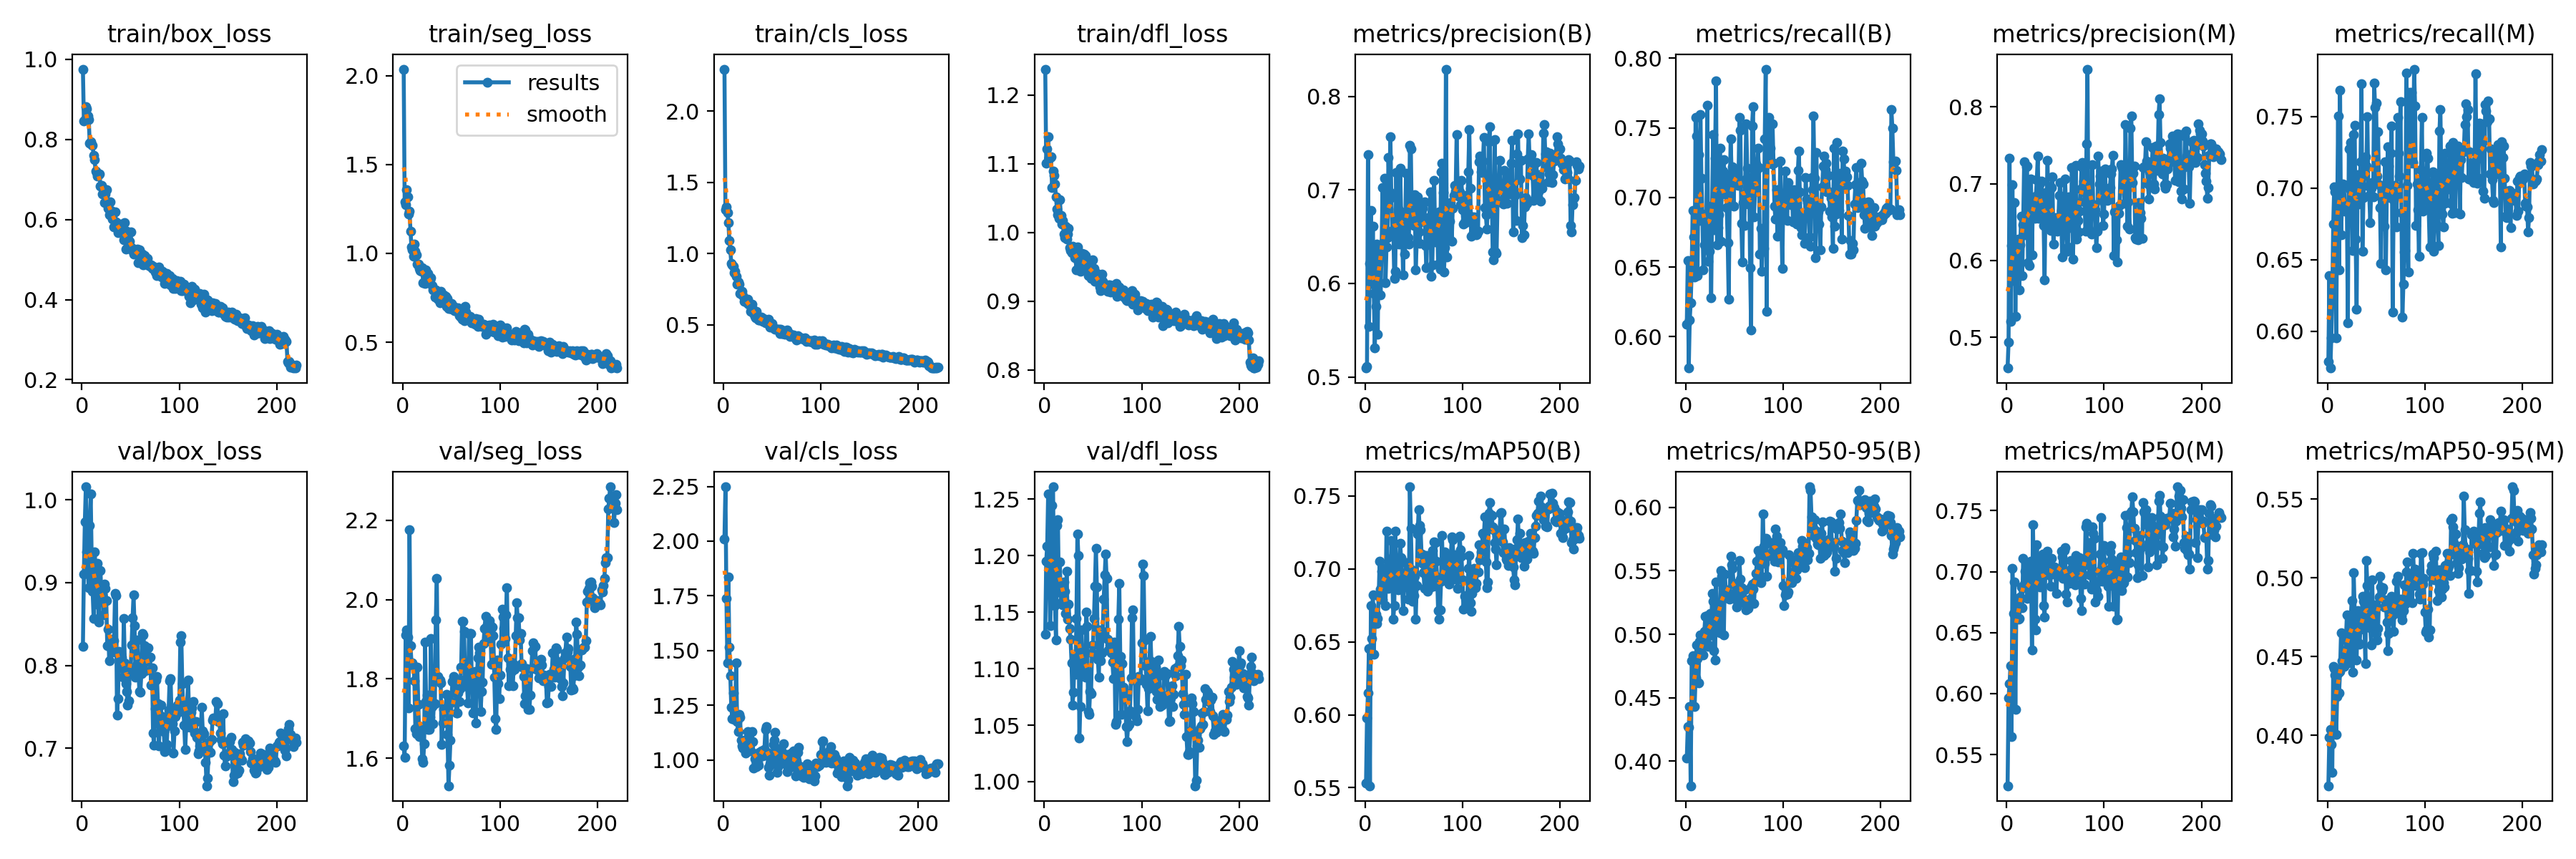

In [14]:
Image("/content/drive/MyDrive/Yolo/results/200_epoch-9/results.png")

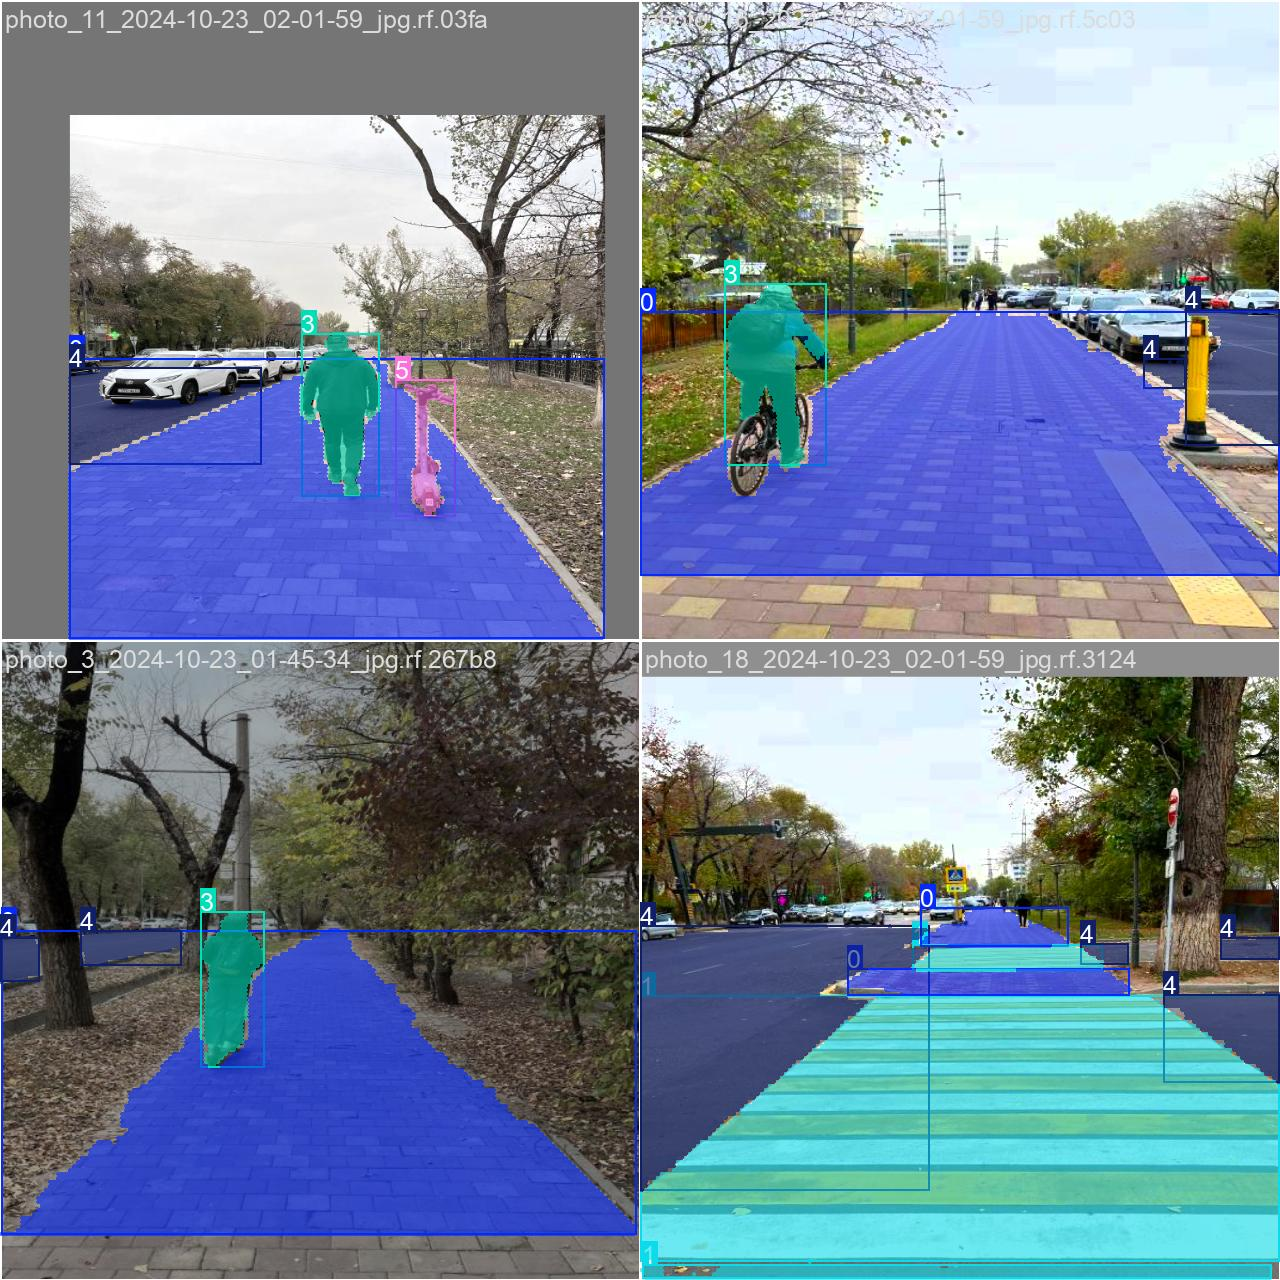

In [ ]:
Image(filename="/content/results/200_epoch-/train_batch1522.jpg", width=640)

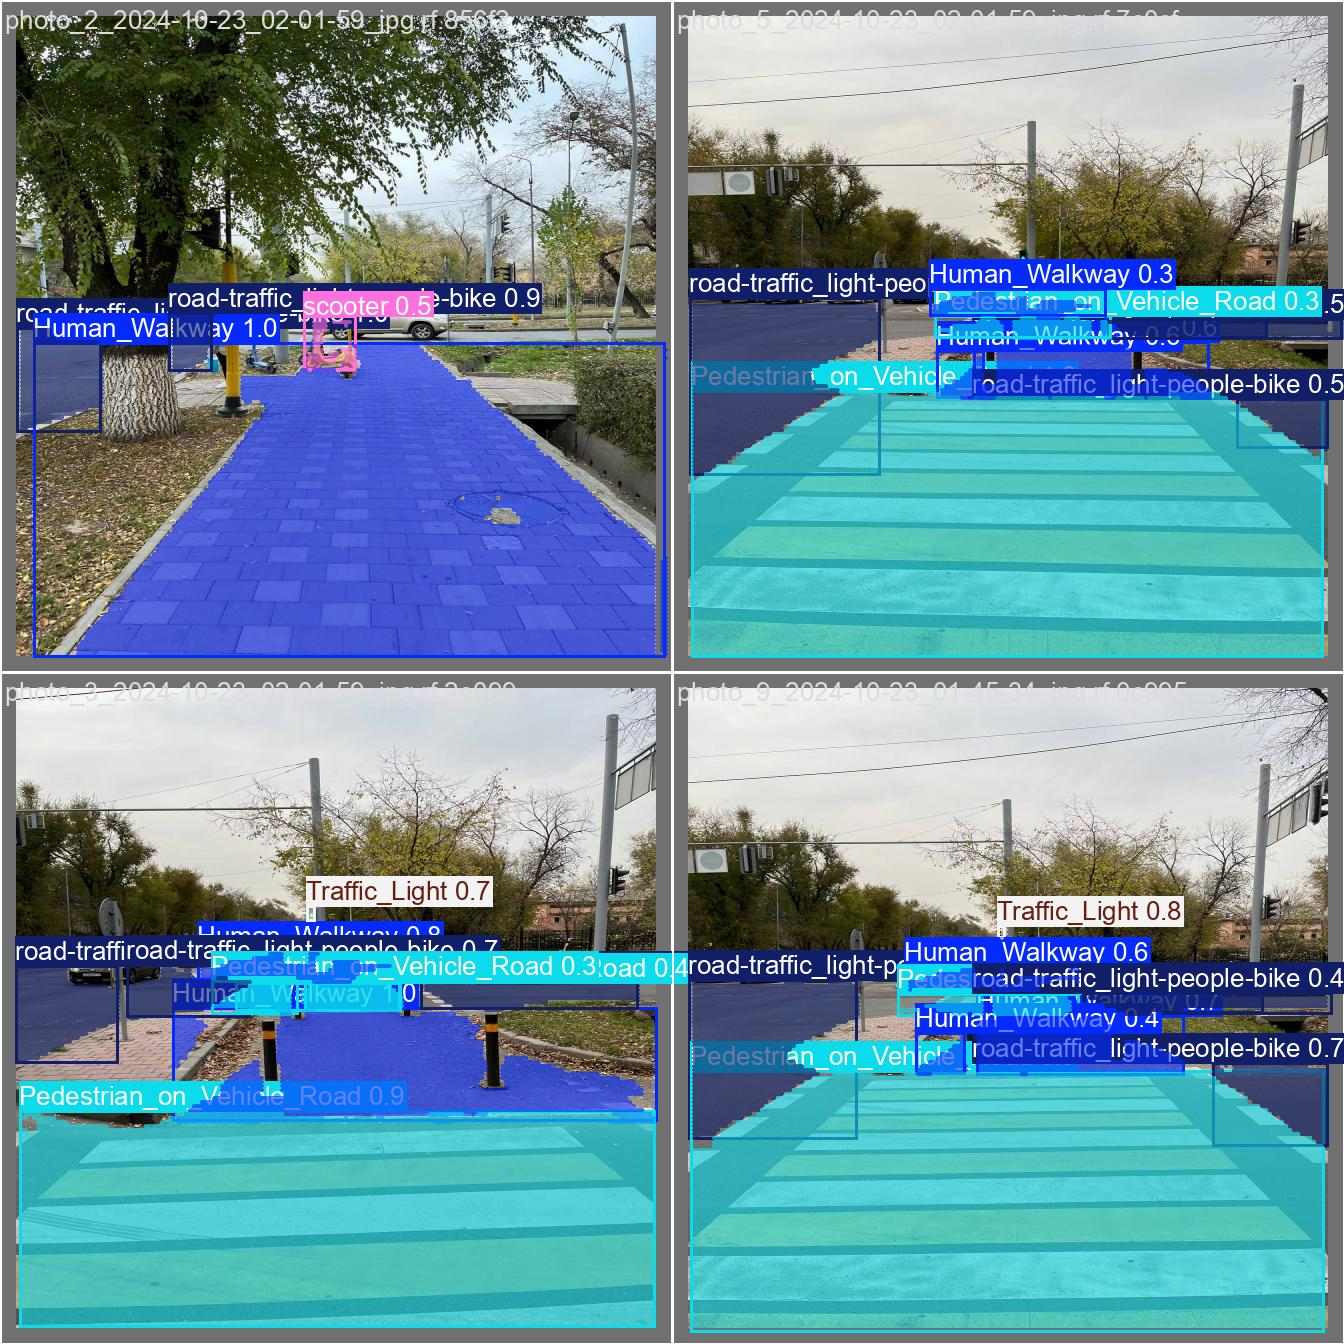

In [ ]:
Image(filename="/content/results/200_epoch-/val_batch1_pred.jpg", width=640)

In [ ]:
my_new_model = YOLO("/content/results/200_epoch-4/weights/best.pt")

In [ ]:
new_image = "/content/valid/images/photo_2_2024-10-23_02-01-59_jpg.rf.856f2b37d6ade5cc7c3f3b6751d1aa32.jpg"
new_results = my_new_model.predict(new_image, conf=0.2)


image 1/1 /content/valid/images/photo_2_2024-10-23_02-01-59_jpg.rf.856f2b37d6ade5cc7c3f3b6751d1aa32.jpg: 640x640 1 Human_Walkway, 4 road-traffic_light-people-bikes, 1 scooter, 17.2ms
Speed: 2.0ms preprocess, 17.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
new_results_array = new_results[0].plot()
plt.figure(figsize=(12,12))
plt.imshow(new_results_array)
plt.show

Output hidden; open in https://colab.research.google.com to view.